In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:

X=titanic[['pclass','sex','age','fare']]
Y=titanic[ 'survived']

In [ ]:
X['age']=X['age'].fillna(X['age'].median())
X['age'].isnull().sum()



<ipython-input-51-20d108552bbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age']=X['age'].fillna(X['age'].median())


0

In [ ]:
#now we need to convert sex into integer value
d={'male':0, 'female':1}

X['sex']=X['sex'].apply(lambda x:d[x])
X['sex'].head()



<ipython-input-52-13b2a9fd6151>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex']=X['sex'].apply(lambda x:d[x])


0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

In [ ]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=7)



In [ ]:
#Using Decision Tree

from sklearn.tree import DecisionTreeClassifier

abc = DecisionTreeClassifier(criterion='entropy' ,random_state=7)
abc.fit(X_train,Y_train)

y_pred4 = abc.predict(X_test)

from sklearn.metrics import accuracy_score
dtac=accuracy_score(Y_test,y_pred4)*100
dtac



74.29906542056075

[Text(0.6331758720930233, 0.9761904761904762, 'X[1] <= 0.5\nentropy = 0.975\nsamples = 498\nvalue = [295, 203]'),
 Text(0.3971656976744186, 0.9285714285714286, 'X[3] <= 14.477\nentropy = 0.722\nsamples = 310\nvalue = [248, 62]'),
 Text(0.15843023255813954, 0.8809523809523809, 'X[2] <= 9.5\nentropy = 0.516\nsamples = 182\nvalue = [161, 21]'),
 Text(0.14680232558139536, 0.8333333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17005813953488372, 0.8333333333333334, 'X[3] <= 6.862\nentropy = 0.501\nsamples = 181\nvalue = [161, 20]'),
 Text(0.15843023255813954, 0.7857142857142857, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.1816860465116279, 0.7857142857142857, 'X[3] <= 7.01\nentropy = 0.521\nsamples = 171\nvalue = [151, 20]'),
 Text(0.15843023255813954, 0.7380952380952381, 'X[2] <= 36.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14680232558139536, 0.6904761904761905, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17005813953488372, 0.69047

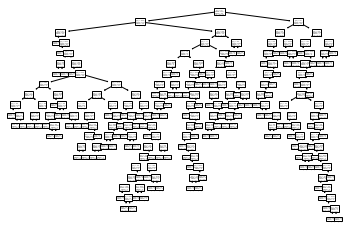

In [ ]:
from sklearn import tree
tree.plot_tree(abc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/salaries for lab5.csv")

In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')



In [ ]:
target=df['salary_more_then_100k']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs[ 'company' ])
inputs['job_n'] = le_job.fit_transform(inputs[ 'job' ])
inputs['degree_n'] = le_degree.fit_transform(inputs[ 'degree' ])

inputs.head()


,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [ ]:
inputs_n = inputs.drop([ 'company', 'job', 'degree' ],axis='columns')


In [ ]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(inputs_n, target)

 

  



DecisionTreeClassifier(criterion='entropy')